In [19]:
from __future__ import print_function
import numpy as np
import math
import copy
import pandas as pd
from keras.utils import np_utils
from keras.datasets import mnist
import time
import pickle
import matplotlib.pylab as plt
import matplotlib.patches as mpatches

## Results

In [20]:
# Load accuracy results for M = 1, 2, 4, 8, 16, 32, 64, 128
with open("out/single/accs_single.pkl", "rb") as f:
    accs_single = pickle.load(f)

with open("out/aggregation/accs_aggr2.pkl", "rb") as f:
    accs_aggr2 = pickle.load(f)
with open("out/aggregation/accs_aggr4.pkl", "rb") as f:
    accs_aggr4 = pickle.load(f)
with open("out/aggregation/accs_aggr8.pkl", "rb") as f:
    accs_aggr8 = pickle.load(f)
with open("out/aggregation/accs_aggr16.pkl", "rb") as f:
    accs_aggr16 = pickle.load(f)
with open("out/aggregation/accs_aggr32.pkl", "rb") as f:
    accs_aggr32 = pickle.load(f)
with open("out/aggregation/accs_aggr64.pkl", "rb") as f:
    accs_aggr64 = pickle.load(f)
with open("out/aggregation/accs_aggr128.pkl", "rb") as f:
    accs_aggr128 = pickle.load(f)

In [21]:
# Hyperparameters Configuration H
lrs_inv = [2048, 4096, 8192]

In [22]:
# Single models results
means_single, vars_single = {}, {}
for lr in lrs_inv:
    means_single[lr] = round(np.max(accs_single[lr][1]), 3)
    vars_single[lr] = round(np.var(accs_single[lr][1]), 8)

data_plt_single = [accs_single[lr][1] for lr in lrs_inv]

print("Mean single models: " + str(means_single))
print("Variance single models: " + str(vars_single))

Mean single models: {2048: 0.864, 4096: 0.86, 8192: 0.85}
Variance single models: {2048: 4.66e-06, 4096: 4.38e-06, 8192: 4.66e-06}


### Aggregation M = 2 models

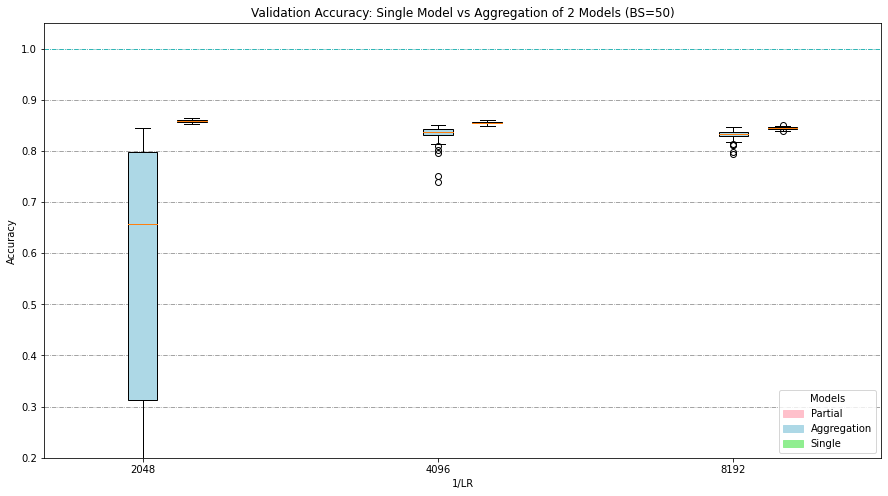

In [23]:
# Plot
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot()
ax.set_title('Validation Accuracy: Single Model vs Aggregation of 2 Models (BS=50)')

data_plt_aggr2 = [accs_aggr2[lr] for lr in lrs_inv]
aggr2_plot = plt.boxplot(data_plt_aggr2, positions=np.array(np.arange(len(data_plt_aggr2)))*3.0, widths=0.3, 
                          patch_artist=True, boxprops=dict(facecolor='lightblue'))
single_plot = plt.boxplot(data_plt_single, positions=np.array(np.arange(len(data_plt_single)))*3.0+0.5, widths=0.3, 
                          patch_artist=True, boxprops=dict(facecolor='lightgreen'))

plt.axhline(y = 1, color = 'c', linestyle = '-.', linewidth = 0.7)    
plt.xticks(np.arange(0, (len(lrs_inv)-0.5) * 3, 3), lrs_inv)
plt.xlim(-1, (len(lrs_inv)-0.5)*3)

ax.set(ylabel='Accuracy', xlabel='1/LR')
plt.grid(True, axis='y', color = 'tab:gray', linestyle = '-.', linewidth = 0.7)
plt.ylim([0.2, 1.05])

part_patch = mpatches.Patch(color='pink', label='Partial')
aggr_patch = mpatches.Patch(color='lightblue', label='Aggregation')
sing_patch = mpatches.Patch(color='lightgreen', label='Single')
plt.legend(handles=[part_patch, aggr_patch, sing_patch], loc=4, title='Models')

plt.show()

In [24]:
# 2 aggregated models results
means_aggr_2, vars_aggr_2 = {}, {}
for lr in lrs_inv:
    means_aggr_2[lr] = round(np.mean(accs_aggr2[lr]), 3)
    vars_aggr_2[lr] = round(np.var(accs_aggr2[lr]), 8)

print("Mean 2 aggregated models: " + str(means_aggr_2))
print("Variance 2 aggregated models: " + str(vars_aggr_2))

diff = []
for lr in lrs_inv:
    diff.append(round(np.subtract(means_aggr_2[lr], means_single[lr]), 3))

print("Difference Single vs. 2 aggregated models: " + str(diff))

Mean 2 aggregated models: {2048: 0.575, 4096: 0.834, 8192: 0.832}
Variance 2 aggregated models: {2048: 0.05948753, 4096: 0.00026486, 8192: 7.742e-05}
Difference Single vs. 2 aggregated models: [-0.289, -0.026, -0.018]


### Aggregation M = 4 models

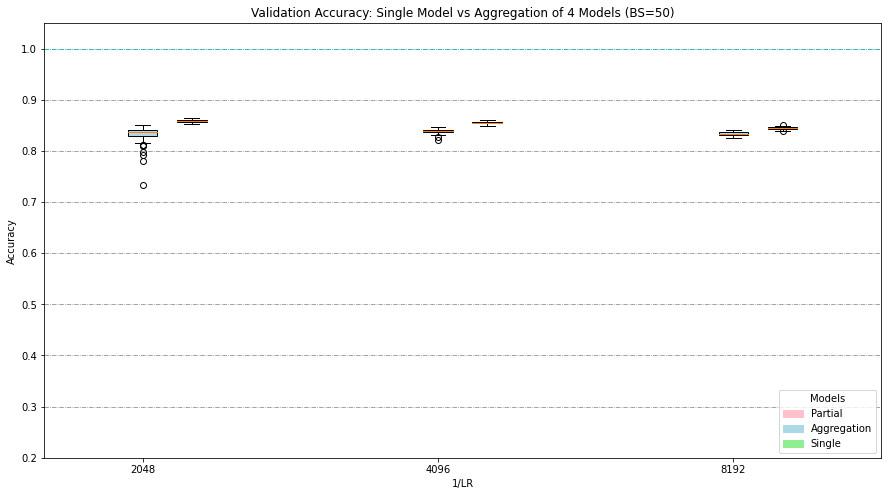

In [25]:
# Plot
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot()
ax.set_title('Validation Accuracy: Single Model vs Aggregation of 4 Models (BS=50)')

data_plt_aggr4 = [accs_aggr4[lr] for lr in lrs_inv]
aggr4_plot = plt.boxplot(data_plt_aggr4, positions=np.array(np.arange(len(data_plt_aggr4)))*3.0, widths=0.3, 
                          patch_artist=True, boxprops=dict(facecolor='lightblue'))
single_plot = plt.boxplot(data_plt_single, positions=np.array(np.arange(len(data_plt_single)))*3.0+0.5, widths=0.3, 
                          patch_artist=True, boxprops=dict(facecolor='lightgreen'))

plt.axhline(y = 1, color = 'c', linestyle = '-.', linewidth = 0.7)    
plt.xticks(np.arange(0, (len(lrs_inv)-0.5) * 3, 3), lrs_inv)
plt.xlim(-1, (len(lrs_inv)-0.5)*3)

ax.set(ylabel='Accuracy', xlabel='1/LR')
plt.grid(True, axis='y', color = 'tab:gray', linestyle = '-.', linewidth = 0.7)
plt.ylim([0.2, 1.05])

part_patch = mpatches.Patch(color='pink', label='Partial')
aggr_patch = mpatches.Patch(color='lightblue', label='Aggregation')
sing_patch = mpatches.Patch(color='lightgreen', label='Single')
plt.legend(handles=[part_patch, aggr_patch, sing_patch], loc=4, title='Models')

plt.show()

In [26]:
# 4 aggregated models results
means_aggr_4, vars_aggr_4 = {}, {}
for lr in lrs_inv:
    means_aggr_4[lr] = round(np.mean(accs_aggr4[lr]), 3)
    vars_aggr_4[lr] = round(np.var(accs_aggr4[lr]), 8)

print("Mean 4 aggregated models: " + str(means_aggr_4))
print("Variance 4 aggregated models: " + str(vars_aggr_4))

diff = []
for lr in lrs_inv:
    diff.append(round(np.subtract(means_aggr_4[lr], means_single[lr]), 3))

print("Difference Single vs. 4 aggregated models: " + str(diff))

Mean 4 aggregated models: {2048: 0.833, 4096: 0.839, 8192: 0.833}
Variance 4 aggregated models: {2048: 0.0002381, 4096: 1.691e-05, 8192: 1.156e-05}
Difference Single vs. 4 aggregated models: [-0.031, -0.021, -0.017]


### Aggregation M = 8 models

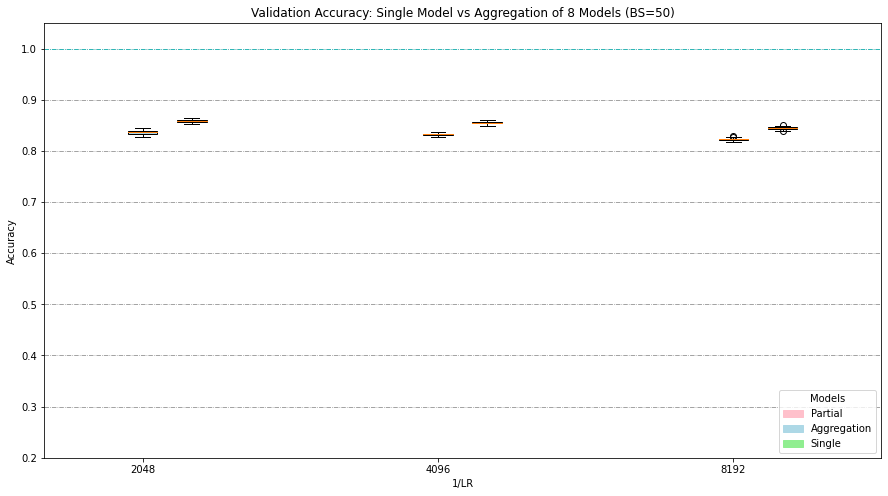

In [27]:
# Plot
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot()
ax.set_title('Validation Accuracy: Single Model vs Aggregation of 8 Models (BS=50)')

data_plt_aggr8 = [accs_aggr8[lr] for lr in lrs_inv]
aggr8_plot = plt.boxplot(data_plt_aggr8, positions=np.array(np.arange(len(data_plt_aggr8)))*3.0, widths=0.3, 
                          patch_artist=True, boxprops=dict(facecolor='lightblue'))
single_plot = plt.boxplot(data_plt_single, positions=np.array(np.arange(len(data_plt_single)))*3.0+0.5, widths=0.3, 
                          patch_artist=True, boxprops=dict(facecolor='lightgreen'))

plt.axhline(y = 1, color = 'c', linestyle = '-.', linewidth = 0.7)    
plt.xticks(np.arange(0, (len(lrs_inv)-0.5) * 3, 3), lrs_inv)
plt.xlim(-1, (len(lrs_inv)-0.5)*3)

ax.set(ylabel='Accuracy', xlabel='1/LR')
plt.grid(True, axis='y', color = 'tab:gray', linestyle = '-.', linewidth = 0.7)
plt.ylim([0.2, 1.05])

part_patch = mpatches.Patch(color='pink', label='Partial')
aggr_patch = mpatches.Patch(color='lightblue', label='Aggregation')
sing_patch = mpatches.Patch(color='lightgreen', label='Single')
plt.legend(handles=[part_patch, aggr_patch, sing_patch], loc=4, title='Models')

plt.show()

In [28]:
# 8 aggregated models results
means_aggr_8, vars_aggr_8 = {}, {}
for lr in lrs_inv:
    means_aggr_8[lr] = round(np.mean(accs_aggr8[lr]), 3)
    vars_aggr_8[lr] = round(np.var(accs_aggr8[lr]), 8)

print("Mean 8 aggregated models: " + str(means_aggr_8))
print("Variance 8 aggregated models: " + str(vars_aggr_8))

diff = []
for lr in lrs_inv:
    diff.append(round(np.subtract(means_aggr_8[lr], means_single[lr]), 3))

print("Difference Single vs. 8 aggregated models: " + str(diff))

Mean 8 aggregated models: {2048: 0.836, 4096: 0.832, 8192: 0.822}
Variance 8 aggregated models: {2048: 8.91e-06, 4096: 3.97e-06, 8192: 3.34e-06}
Difference Single vs. 8 aggregated models: [-0.028, -0.028, -0.028]


### Aggregation M = 16 models

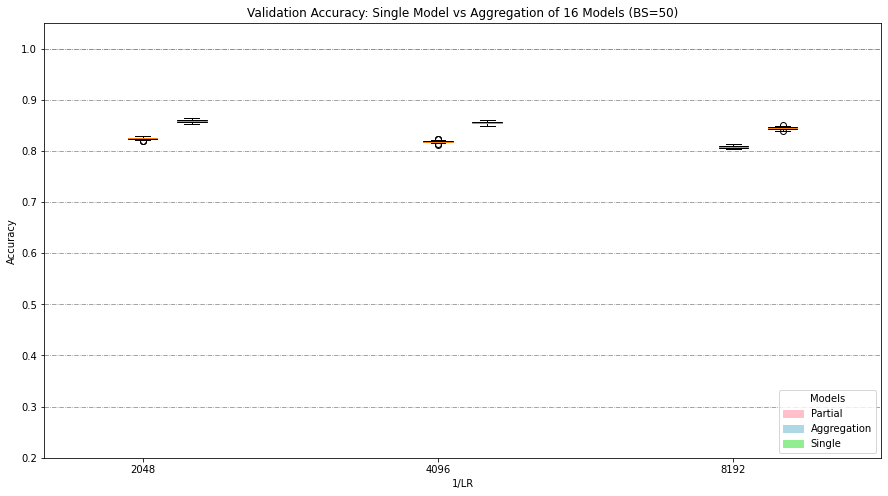

In [29]:
# Plot
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot()
ax.set_title('Validation Accuracy: Single Model vs Aggregation of 16 Models (BS=50)')

data_plt_aggr16 = [accs_aggr16[lr] for lr in lrs_inv]
aggr16_plot = plt.boxplot(data_plt_aggr16, positions=np.array(np.arange(len(data_plt_aggr16)))*3.0, widths=0.3, 
                          patch_artist=True, boxprops=dict(facecolor='lightblue'))
single_plot = plt.boxplot(data_plt_single, positions=np.array(np.arange(len(data_plt_single)))*3.0+0.5, widths=0.3, 
                          patch_artist=True, boxprops=dict(facecolor='lightgreen'))

plt.axhline(y = 1, color = 'c', linestyle = '-.', linewidth = 0.7)    
plt.xticks(np.arange(0, (len(lrs_inv)-0.5) * 3, 3), lrs_inv)
plt.xlim(-1, (len(lrs_inv)-0.5)*3)

ax.set(ylabel='Accuracy', xlabel='1/LR')
plt.grid(True, axis='y', color = 'tab:gray', linestyle = '-.', linewidth = 0.7)
plt.ylim([0.2, 1.05])

part_patch = mpatches.Patch(color='pink', label='Partial')
aggr_patch = mpatches.Patch(color='lightblue', label='Aggregation')
sing_patch = mpatches.Patch(color='lightgreen', label='Single')
plt.legend(handles=[part_patch, aggr_patch, sing_patch], loc=4, title='Models')

plt.show()

In [30]:
# 16 aggregated models results
means_aggr_16, vars_aggr_16 = {}, {}
for lr in lrs_inv:
    means_aggr_16[lr] = round(np.mean(accs_aggr16[lr]), 3)
    vars_aggr_16[lr] = round(np.var(accs_aggr16[lr]), 8)

print("Mean 16 aggregated models: " + str(means_aggr_16))
print("Variance 16 aggregated models: " + str(vars_aggr_16))

diff = []
for lr in lrs_inv:
    diff.append(round(np.subtract(means_aggr_16[lr], means_single[lr]), 3))

print("Difference Single vs. 16 aggregated models: " + str(diff))

Mean 16 aggregated models: {2048: 0.825, 4096: 0.818, 8192: 0.808}
Variance 16 aggregated models: {2048: 4.32e-06, 4096: 3.47e-06, 8192: 4.12e-06}
Difference Single vs. 16 aggregated models: [-0.039, -0.042, -0.042]


### Aggregation M = 32 models

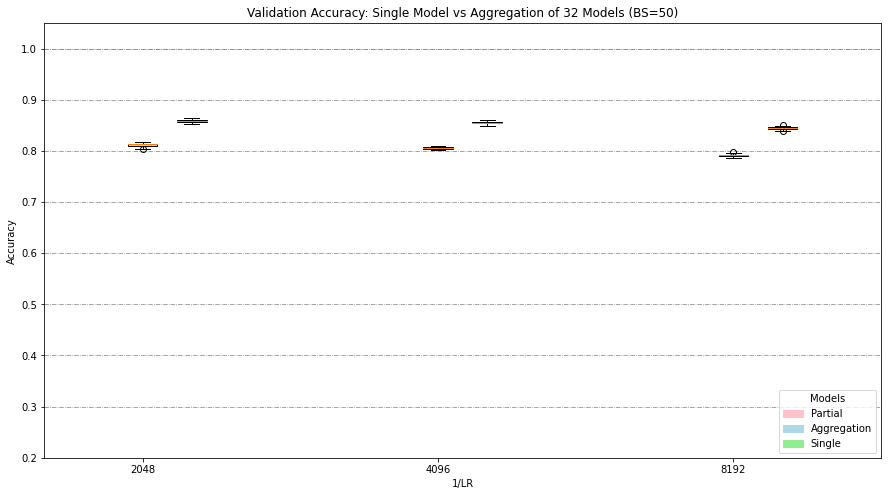

In [31]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot()
ax.set_title('Validation Accuracy: Single Model vs Aggregation of 32 Models (BS=50)')

data_plt_aggr32 = [accs_aggr32[lr] for lr in lrs_inv]
aggr32_plot = plt.boxplot(data_plt_aggr32, positions=np.array(np.arange(len(data_plt_aggr32)))*3.0, widths=0.3, 
                          patch_artist=True, boxprops=dict(facecolor='lightblue'))
single_plot = plt.boxplot(data_plt_single, positions=np.array(np.arange(len(data_plt_single)))*3.0+0.5, widths=0.3, 
                          patch_artist=True, boxprops=dict(facecolor='lightgreen'))

plt.axhline(y = 1, color = 'c', linestyle = '-.', linewidth = 0.7)    
plt.xticks(np.arange(0, (len(lrs_inv)-0.5) * 3, 3), lrs_inv)
plt.xlim(-1, (len(lrs_inv)-0.5)*3)

ax.set(ylabel='Accuracy', xlabel='1/LR')
plt.grid(True, axis='y', color = 'tab:gray', linestyle = '-.', linewidth = 0.7)
plt.ylim([0.2, 1.05])

part_patch = mpatches.Patch(color='pink', label='Partial')
aggr_patch = mpatches.Patch(color='lightblue', label='Aggregation')
sing_patch = mpatches.Patch(color='lightgreen', label='Single')
plt.legend(handles=[part_patch, aggr_patch, sing_patch], loc=4, title='Models')

plt.show()

In [32]:
# 32 aggregated models results
means_aggr_32, vars_aggr_32 = {}, {}
for lr in lrs_inv:
    means_aggr_32[lr] = round(np.mean(accs_aggr32[lr]), 3)
    vars_aggr_32[lr] = round(np.var(accs_aggr32[lr]), 8)

print("Mean 32 aggregated models: " + str(means_aggr_32))
print("Variance 32 aggregated models: " + str(vars_aggr_32))

diff = []
for lr in lrs_inv:
    diff.append(round(np.subtract(means_aggr_32[lr], means_single[lr]), 3))

print("Difference Single vs. 32 aggregated models: " + str(diff))

Mean 32 aggregated models: {2048: 0.812, 4096: 0.805, 8192: 0.791}
Variance 32 aggregated models: {2048: 1.012e-05, 4096: 3.75e-06, 8192: 5.3e-06}
Difference Single vs. 32 aggregated models: [-0.052, -0.055, -0.059]


### Aggregation M = 64 models

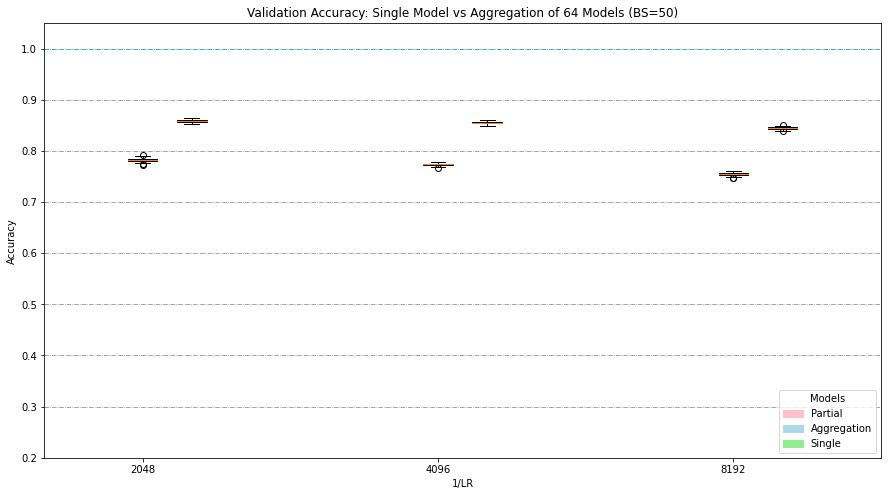

In [33]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot()
ax.set_title('Validation Accuracy: Single Model vs Aggregation of 64 Models (BS=50)')

data_plt_aggr64 = [accs_aggr64[lr] for lr in lrs_inv]
aggr64_plot = plt.boxplot(data_plt_aggr64, positions=np.array(np.arange(len(data_plt_aggr64)))*3.0, widths=0.3, 
                          patch_artist=True, boxprops=dict(facecolor='lightblue'))
single_plot = plt.boxplot(data_plt_single, positions=np.array(np.arange(len(data_plt_single)))*3.0+0.5, widths=0.3, 
                          patch_artist=True, boxprops=dict(facecolor='lightgreen'))

plt.axhline(y = 1, color = 'c', linestyle = '-.', linewidth = 0.7)    
plt.xticks(np.arange(0, (len(lrs_inv)-0.5) * 3, 3), lrs_inv)
plt.xlim(-1, (len(lrs_inv)-0.5)*3)

ax.set(ylabel='Accuracy', xlabel='1/LR')
plt.grid(True, axis='y', color = 'tab:gray', linestyle = '-.', linewidth = 0.7)
plt.ylim([0.2, 1.05])

part_patch = mpatches.Patch(color='pink', label='Partial')
aggr_patch = mpatches.Patch(color='lightblue', label='Aggregation')
sing_patch = mpatches.Patch(color='lightgreen', label='Single')
plt.legend(handles=[part_patch, aggr_patch, sing_patch], loc=4, title='Models')

plt.show()

In [34]:
# 64 aggregated models results
means_aggr_64, vars_aggr_64 = {}, {}
for lr in lrs_inv:
    means_aggr_64[lr] = round(np.mean(accs_aggr64[lr]), 3)
    vars_aggr_64[lr] = round(np.var(accs_aggr64[lr]), 8)

print("Mean 64 aggregated models: " + str(means_aggr_64))
print("Variance 64 aggregated models: " + str(vars_aggr_64))

diff = []
for lr in lrs_inv:
    diff.append(round(np.subtract(means_aggr_64[lr], means_single[lr]), 3))

print("Difference Single vs. 64 aggregated models: " + str(diff))

Mean 64 aggregated models: {2048: 0.783, 4096: 0.774, 8192: 0.754}
Variance 64 aggregated models: {2048: 9.2e-06, 4096: 4.73e-06, 8192: 7.05e-06}
Difference Single vs. 64 aggregated models: [-0.081, -0.086, -0.096]


### Aggregation M = 128 models

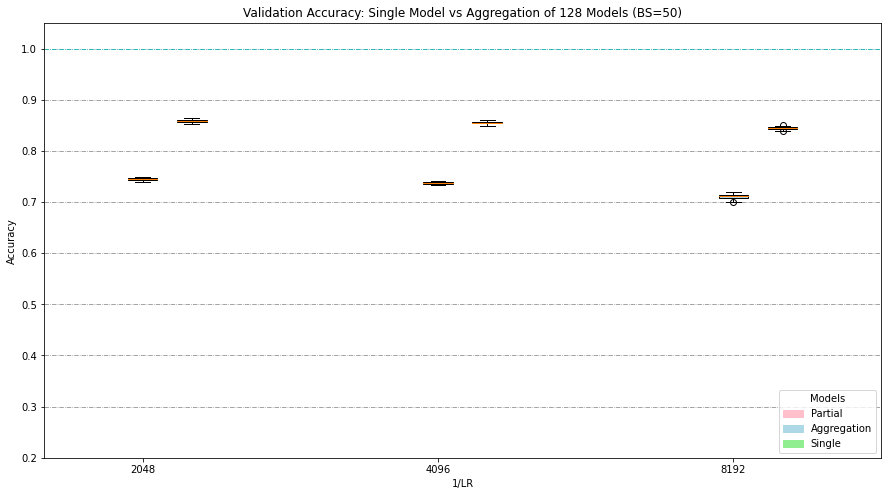

In [35]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot()
ax.set_title('Validation Accuracy: Single Model vs Aggregation of 128 Models (BS=50)')

data_plt_aggr128 = [accs_aggr128[lr] for lr in lrs_inv]
aggr128_plot = plt.boxplot(data_plt_aggr128, positions=np.array(np.arange(len(data_plt_aggr128)))*3.0, widths=0.3, 
                          patch_artist=True, boxprops=dict(facecolor='lightblue'))
single_plot = plt.boxplot(data_plt_single, positions=np.array(np.arange(len(data_plt_single)))*3.0+0.5, widths=0.3, 
                          patch_artist=True, boxprops=dict(facecolor='lightgreen'))

plt.axhline(y = 1, color = 'c', linestyle = '-.', linewidth = 0.7)    
plt.xticks(np.arange(0, (len(lrs_inv)-0.5) * 3, 3), lrs_inv)
plt.xlim(-1, (len(lrs_inv)-0.5)*3)

ax.set(ylabel='Accuracy', xlabel='1/LR')
plt.grid(True, axis='y', color = 'tab:gray', linestyle = '-.', linewidth = 0.7)
plt.ylim([0.2, 1.05])

part_patch = mpatches.Patch(color='pink', label='Partial')
aggr_patch = mpatches.Patch(color='lightblue', label='Aggregation')
sing_patch = mpatches.Patch(color='lightgreen', label='Single')
plt.legend(handles=[part_patch, aggr_patch, sing_patch], loc=4, title='Models')

plt.show()

In [36]:
# 128 aggregated models results
means_aggr_128, vars_aggr_128 = {}, {}
for lr in lrs_inv:
    means_aggr_128[lr] = round(np.mean(accs_aggr128[lr]), 3)
    vars_aggr_128[lr] = round(np.var(accs_aggr128[lr]), 8)

print("Mean 128 aggregated models: " + str(means_aggr_128))
print("Variance 128 aggregated models: " + str(vars_aggr_128))

diff = []
for lr in lrs_inv:
    diff.append(round(np.subtract(means_aggr_128[lr], means_single[lr]), 3))

print("Difference Single vs. 128 aggregated models: " + str(diff))

Mean 128 aggregated models: {2048: 0.745, 4096: 0.738, 8192: 0.711}
Variance 128 aggregated models: {2048: 4.57e-06, 4096: 3.25e-06, 8192: 2.014e-05}
Difference Single vs. 128 aggregated models: [-0.119, -0.122, -0.139]
